In [462]:
%matplotlib inline

import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
import gc
import matplotlib.pyplot as plt
import seaborn as sb
from fastai.imports import *
# from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import missingno as msno
from sklearn.model_selection import train_test_split
import statistics

In [463]:
df = pd.read_csv('bank-marketing/bank-additional-full.csv', sep=';')
# df['id'] = df.index + 1

In [464]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [465]:
df.shape

(41188, 21)

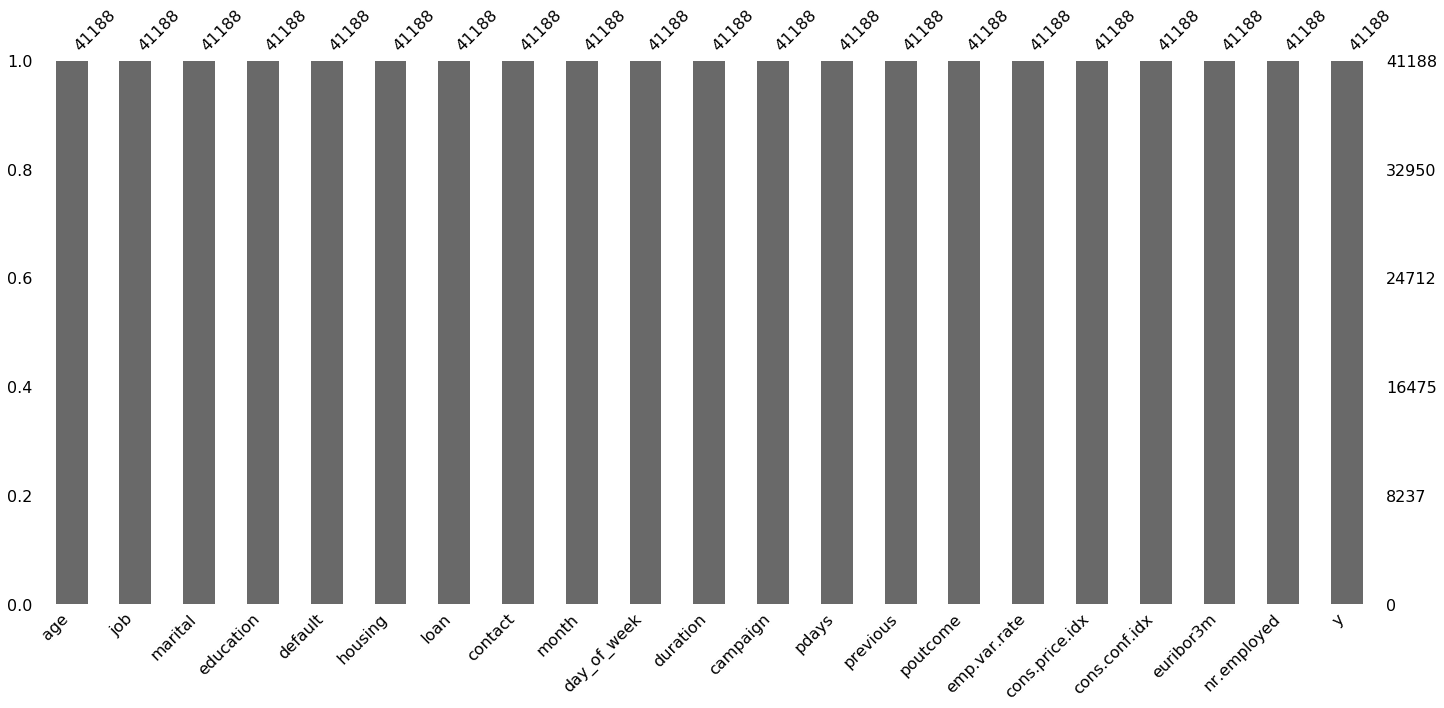

In [466]:
msno.bar(df)

In [467]:
# Split into predictor and response dataframes.

X_df = df.drop('y', axis=1)
y = df['y']

X_df.shape,y.shape

((41188, 20), (41188,))

In [468]:
# Map response variable to integers 0,1.

y = pd.Series(np.where(y.values == 'yes',1,0), y.index)

In [469]:
y.value_counts()

0    36548
1     4640
dtype: int64

In [470]:
# Separating with continuous and categorical variables.

X_cont = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
X_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

cont_df = X_df[X_cont]
cat_df = X_df[X_cat]

In [471]:
# Converting categorical features to numerical values.

cat_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [472]:
pd.get_dummies(cat_df).describe()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.253035,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,0.163713,0.024619,0.008012,0.111974,0.605225,0.280859,0.001942,0.101389,0.055647,0.146766,0.231014,0.000437,0.127294,0.295426,0.042027,0.791201,0.208726,0.000073,0.452122,0.024036,0.523842,0.824269,0.024036,0.151695,0.634748,0.365252,0.063902,0.149995,0.004419,0.174177,0.129115,0.013256,0.334296,0.099568,0.017432,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335
std,0.434756,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,0.295092,0.144199,0.370019,0.154962,0.089152,0.315339,0.488808,0.449424,0.044029,0.301846,0.229242,0.353877,0.421486,0.020901,0.333306,0.456239,0.200653,0.406455,0.406403,0.008534,0.497708,0.153163,0.499437,0.380596,0.153163,0.358729,0.481507,0.481507,0.244581,0.357071,0.066328,0.379266,0.335332,0.114372,0.471750,0.299427,0.130877,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [473]:
# Initial numeric dataframe

X_df = cont_df.join(pd.get_dummies(cat_df))

In [474]:
X_df.shape

(41188, 61)

In [475]:
X_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [476]:
# Split into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28831, 61), (12357, 61), (28831,), (12357,))

In [477]:
# Initial logistic regression

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
model_base = clf.fit(X_train, y_train)

In [478]:
y_pred = model_base.predict(X_test)
model_base.score(X_test, y_test)

0.8969814679938496

In [479]:
metrics.confusion_matrix(y_test, y_pred)
# print(metrics.classification_report(y_test, y_pred))

array([[10783,   152],
       [ 1121,   301]])

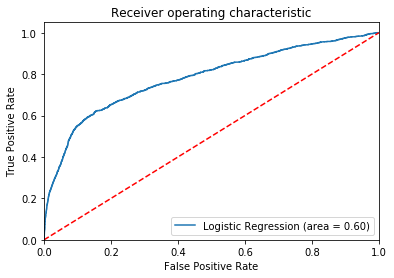

In [480]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model_base.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_base.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Feature Importance

In [481]:
# Feature importance rankings.

weights = zip(X_df.columns, model_base.coef_[0])
ranked_weights = sorted(weights, key=lambda x: x[1], reverse = True)

In [482]:
# Top 10 positive feature importance

ranked_weights[:10]

[('cons.price.idx', 0.39610086315723614),
 ('month_mar', 0.35625854204800234),
 ('month_jul', 0.2865413647808379),
 ('contact_cellular', 0.18674623517331979),
 ('job_retired', 0.1607883891617834),
 ('month_aug', 0.14634932724880875),
 ('poutcome_nonexistent', 0.14612978276185729),
 ('default_no', 0.13061074740166032),
 ('job_student', 0.11442395754999501),
 ('day_of_week_wed', 0.11441101743810074)]

In [483]:
# Top 10 negative feature importance

ranked_weights[-10:]

[('job_blue-collar', -0.11352190105646934),
 ('job_services', -0.1208574036559078),
 ('default_unknown', -0.12591605739216435),
 ('previous', -0.13466955889068602),
 ('contact_telephone', -0.1827828442442824),
 ('month_nov', -0.1855335510350993),
 ('poutcome_failure', -0.21090745178466289),
 ('day_of_week_mon', -0.2187372449988069),
 ('emp.var.rate', -0.35478549895696837),
 ('month_may', -0.664151647519743)]

In [484]:
abs_weights = zip(X_df.columns, model_base.coef_[0]) 
abs_ranked_weights = sorted(abs_weights, key=lambda x: abs(x[1]), reverse = True)
abs_ranked_weights[:10]

[('month_may', -0.664151647519743),
 ('cons.price.idx', 0.39610086315723614),
 ('month_mar', 0.35625854204800234),
 ('emp.var.rate', -0.35478549895696837),
 ('month_jul', 0.2865413647808379),
 ('day_of_week_mon', -0.2187372449988069),
 ('poutcome_failure', -0.21090745178466289),
 ('contact_cellular', 0.18674623517331979),
 ('month_nov', -0.1855335510350993),
 ('contact_telephone', -0.1827828442442824)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

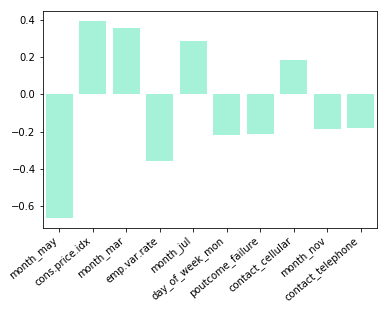

In [485]:
# Absolute value feature importance plot

labels, weights = zip(*abs_ranked_weights[:10])
sb.barplot(x = pd.Series(labels), y = pd.Series(weights), color='aquamarine', alpha=0.8)
plt.xticks(rotation=40, ha='right')

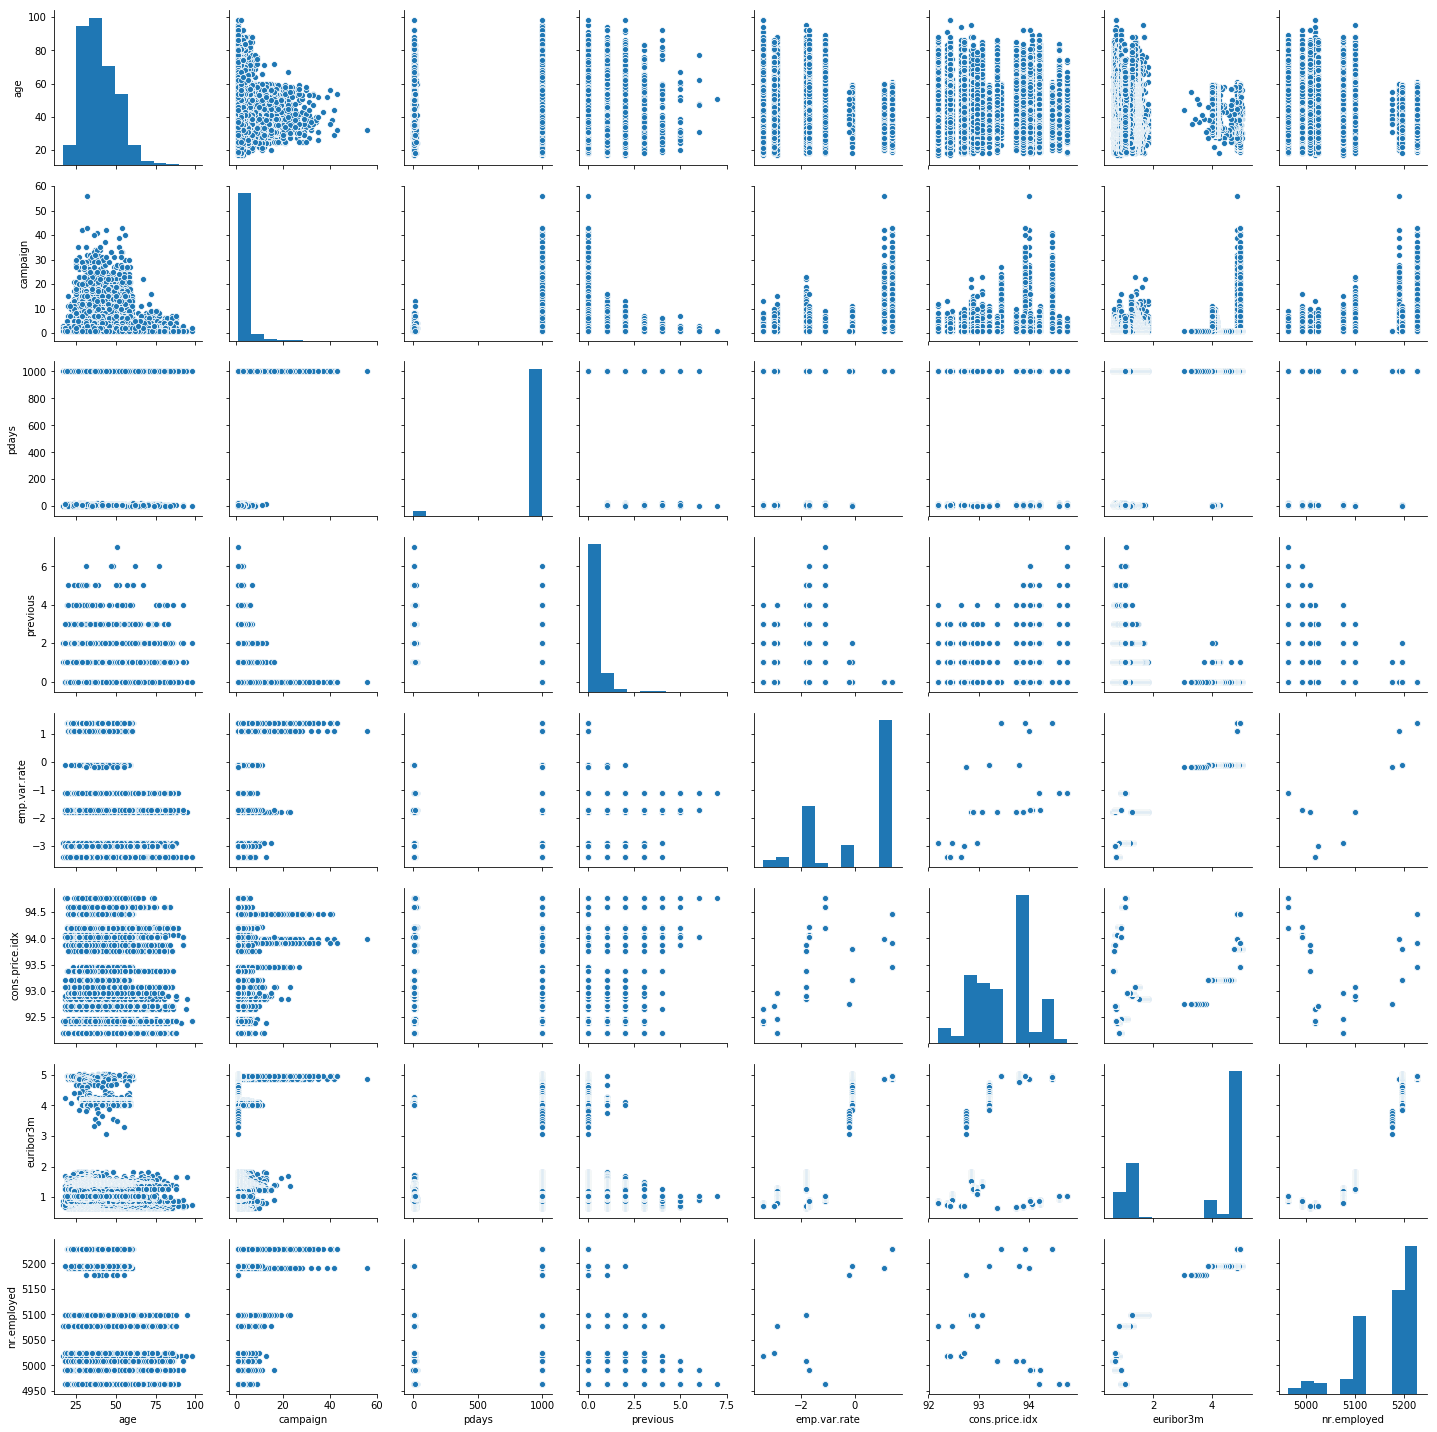

In [486]:
# Pairplot to look at distributions.

sb.pairplot(cont_df)

## Feature engineering

In [487]:
X_df_2 = X_df.copy()

In [488]:
# Creating binary variable for whether there was previous contact.

X_df_2[(X_df_2['previous'] == 0) & (X_df_2['pdays'] != 999)]

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success


In [368]:
X_df_2['previous_contact'] = np.where(X_df_2['pdays'] == 999, 0, 1)

X_df_2 = X_df_2.drop('pdays', axis = 1)
X_cont.remove('pdays')

In [369]:
# Normalizing continuous variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_df_2[X_cont])
X_df_2[X_cont] = scaler.transform(X_df_2[X_cont])

In [449]:
coef_thresh = np.percentile(abs(model_base.coef_[0]), 20)
coef_thresh

0.04007959364168418

In [453]:
low_coefs = [feature[0] for feature in abs_ranked_weights if abs(feature[1]) < coef_thresh]
low_coefs

['loan_unknown',
 'age',
 'housing_no',
 'loan_no',
 'housing_yes',
 'job_student',
 'day_of_week_thu',
 'job_blue-collar',
 'default_yes',
 'education_basic.4y',
 'education_professional.course',
 'education_university.degree']

In [457]:
X_df_2 = X_df_2.drop(columns = low_coefs)
X_df_2.shape

(41188, 49)

In [458]:
# Highly correlated features

corr_mat = X_df_2.corr()
half_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
half_corr_mat.head()

,campaign,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,job_admin.,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_unknown,default_no,default_unknown,housing_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,previous_contact
campaign,NaN,-0.079141,0.150754,0.127836,0.135133,0.144095,0.011745,-0.002203,0.004226,-0.009135,-0.006847,0.006361,0.002383,0.001557,-0.000200,0.002625,0.005872,0.002332,-0.007624,0.009873,-0.000991,-0.005278,0.000195,-0.002188,0.002162,-0.032923,0.033007,-0.000396,0.005294,-0.077368,0.077368,-0.058519,0.015009,-0.009819,0.098385,0.070144,-0.015244,-0.032704,-0.079028,-0.049126,-0.033953,0.026641,0.014405,-0.025125,-0.021088,-0.068890,0.087645,-0.050893,-0.052569
previous,NaN,NaN,-0.420489,-0.203130,-0.454494,-0.501333,0.018888,-0.013239,-0.011569,0.006735,0.065113,-0.011231,-0.011885,-0.017142,0.008426,-0.003345,-0.003066,-0.043420,0.048485,0.009095,-0.021493,-0.026418,0.014347,-0.002613,0.022641,0.102533,-0.102604,0.003769,-0.002143,0.212848,-0.212848,0.079384,-0.048852,0.059557,-0.116785,-0.069905,0.072733,-0.012534,0.081050,0.127754,0.157651,0.004404,-0.002012,0.000090,-0.003929,0.682608,-0.878776,0.524045,0.587462
emp.var.rate,NaN,NaN,NaN,0.775334,0.972245,0.906970,-0.024572,0.009363,0.036367,-0.016642,-0.103678,0.001477,0.019431,0.054268,-0.019581,0.015789,0.018558,0.080189,-0.099403,-0.008513,0.023065,0.020422,-0.017078,-0.002865,-0.003038,-0.203285,0.203218,0.003152,0.001193,-0.393584,0.393584,-0.312990,0.177895,-0.124174,0.314863,0.148653,-0.138849,-0.111356,-0.105917,-0.213706,-0.170366,-0.015277,-0.018139,0.014582,0.026797,-0.381706,0.472501,-0.256886,-0.270945
cons.price.idx,NaN,NaN,NaN,NaN,0.688230,0.522034,-0.041840,0.009825,0.028335,-0.025268,-0.052251,-0.005122,0.033282,-0.010849,-0.003262,0.022246,0.018956,0.046424,-0.063013,-0.007958,0.031201,0.034202,0.008704,-0.009332,0.030016,-0.168234,0.168322,0.016361,-0.005944,-0.591474,0.591474,-0.205878,-0.192027,-0.099017,0.253303,0.445513,-0.095783,-0.057274,-0.215273,-0.092174,-0.046905,0.002569,0.001273,0.001216,0.012479,-0.297718,0.304264,-0.077416,-0.078715
euribor3m,NaN,NaN,NaN,NaN,NaN,0.945154,-0.023831,0.018744,0.036392,-0.001590,-0.102454,0.007421,0.014666,0.050793,-0.014171,0.016982,0.019309,0.088908,-0.109479,-0.007840,0.021225,0.018334,-0.020583,-0.001263,-0.006061,-0.195337,0.195251,0.002873,-0.000487,-0.399773,0.399773,-0.340480,0.164534,-0.105860,0.281835,0.141107,-0.164298,-0.133859,0.019524,-0.185937,-0.190321,-0.015371,-0.023279,0.022732,0.030201,-0.385417,0.488406,-0.281022,-0.296920


In [459]:
len([col for col in half_corr_mat if any(half_corr_mat[col] > 0.9)])

3

0.896495913247552


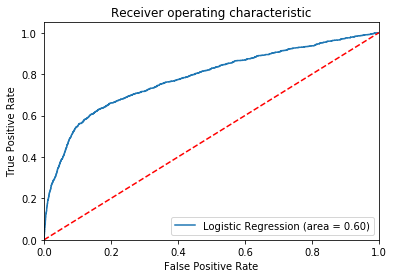

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X_df_2, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

clf = LogisticRegression()
model_norm = clf.fit(X_train, y_train)
y_pred = model_norm.predict(X_test)
print(model_norm.score(X_test, y_test))

logit_roc_auc = roc_auc_score(y_test, model_norm.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_norm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [402]:
X_df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,3.621291,5167.035911,0.253035,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,0.163713,0.024619,0.008012,0.111974,0.605225,0.280859,0.001942,0.101389,0.055647,0.146766,0.231014,0.000437,0.127294,0.295426,0.042027,0.791201,0.208726,0.000073,0.452122,0.024036,0.523842,0.824269,0.024036,0.151695,0.634748,0.365252,0.063902,0.149995,0.004419,0.174177,0.129115,0.013256,0.334296,0.099568,0.017432,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,1.734447,72.251528,0.434756,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,0.295092,0.144199,0.370019,0.154962,0.089152,0.315339,0.488808,0.449424,0.044029,0.301846,0.229242,0.353877,0.421486,0.020901,0.333306,0.456239,0.200653,0.406455,0.406403,0.008534,0.497708,0.153163,0.499437,0.380596,0.153163,0.358729,0.481507,0.481507,0.244581,0.357071,0.066328,0.379266,0.335332,0.114372,0.471750,0.299427,0.130877,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,1.344000,5099.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,4.857000,5191.000000,0.000000,0.000000,0

## Random Forest Implementation